# Group 37
<b>Aditi Gupta            2021FC04386
<p><b>Deepak Kumar G      2021FC04505
<p><b>Rahul Basu          2021FC04195

<b>Dataset
<p>Dataset: DryBean Dataset
https://docs.google.com/spreadsheets/d/1i0iRlFLk-e0Ph_m-I8DQq0i89NVZRsGl/edit?usp=sharing&ouid=117246691178100274106&rtpof=true&sd=true

<p>Dataset description file Link:
https://drive.google.com/file/d/1NDKgR6-6aZhbDbKqtidiZ1dHH7oZOTRY/view?usp=sharing

# Import Libraries/Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score
from sklearn.metrics import average_precision_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

<b>Sanity check

In [3]:
df.head(2)

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1.0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2.0,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER


# Data Visualization and Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bean ID          13611 non-null  float64
 1   Area             13611 non-null  float64
 2   Perimeter        13611 non-null  float64
 3   MajorAxisLength  13609 non-null  float64
 4   MinorAxisLength  13608 non-null  float64
 5   AspectRation     13610 non-null  float64
 6   Eccentricity     13609 non-null  float64
 7   ConvexArea       13611 non-null  float64
 8   EquivDiameter    13611 non-null  float64
 9   Extent           13611 non-null  float64
 10  Solidity         13608 non-null  float64
 11  roundness        13611 non-null  float64
 12  Compactness      13607 non-null  float64
 13  ShapeFactor1     13607 non-null  float64
 14  ShapeFactor2     13609 non-null  float64
 15  ShapeFactor3     13611 non-null  float64
 16  ShapeFactor4     13611 non-null  float64
 17  Class       

In [5]:
df.shape

(13611, 18)

In [6]:
df.describe()

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13609.000000,13608.000000,13610.000000,13609.000000,13611.000000,13611.000000,13611.000000,13608.000000,13611.000000,13607.000000,13607.000000,13609.000000,13611.000000,13611.000000
mean,6806.000000,53048.284549,855.283459,320.155372,202.273996,1.583268,0.750930,53768.200206,253.064220,0.749733,0.987142,0.873282,0.799830,0.006564,0.001716,0.643590,0.995063
std,3929.301592,29324.095717,214.289696,85.693199,44.974478,0.246669,0.091962,29774.915817,59.177120,0.049086,0.004661,0.059520,0.061691,0.001128,0.000596,0.098996,0.004366
min,1.000000,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,3403.500000,36328.000000,703.523500,253.319280,175.840519,1.432352,0.715953,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762444,0.005900,0.001153,0.581359,0.993703
50%,6806.000000,44652.000000,794.941000,296.899313,192.443880,1.551132,0.764446,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801227,0.006645,0.001694,0.642044,0.996386
75%,10208.500000,61332.000000,977.213000,376.497678,217.036082,1.707118,0.810471,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834234,0.007272,0.002170,0.696006,0.997883
max,13611.000000,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


# Data Pre-processing and cleaning

# Check for Class Imbalance

In [7]:
bean_class = pd.DataFrame()
bean_class['Class'] = df['Class'].value_counts()
bean_class['Percentage'] = bean_class['Class']/bean_class['Class'].sum() * 100
bean_class

,Class,Percentage
DERMASON,3546,26.052458
SIRA,2636,19.366689
SEKER,2027,14.892366
HOROZ,1928,14.165014
CALI,1630,11.975608
BARBUNYA,1322,9.712732
BOMBAY,522,3.835133


<AxesSubplot:xlabel='Class', ylabel='count'>

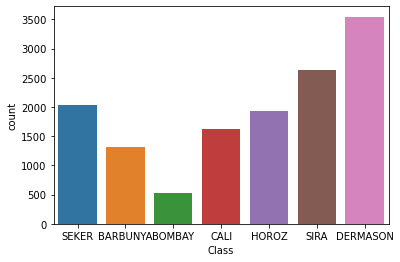

In [8]:
sns.countplot(x='Class', data=df)

<b> Conclusion: 
Majority of class = Dermason (26% of data)
Minority of class = Bombay (4% of data)
Difference btw majority and minority = 26-4 = 22%
<p><b>Therefore Sampling is required

In [9]:
df1= df.copy(deep=True)

In [10]:
df1 = df.drop(['Class','Bean ID'],axis=1)

<b> Box Plot 

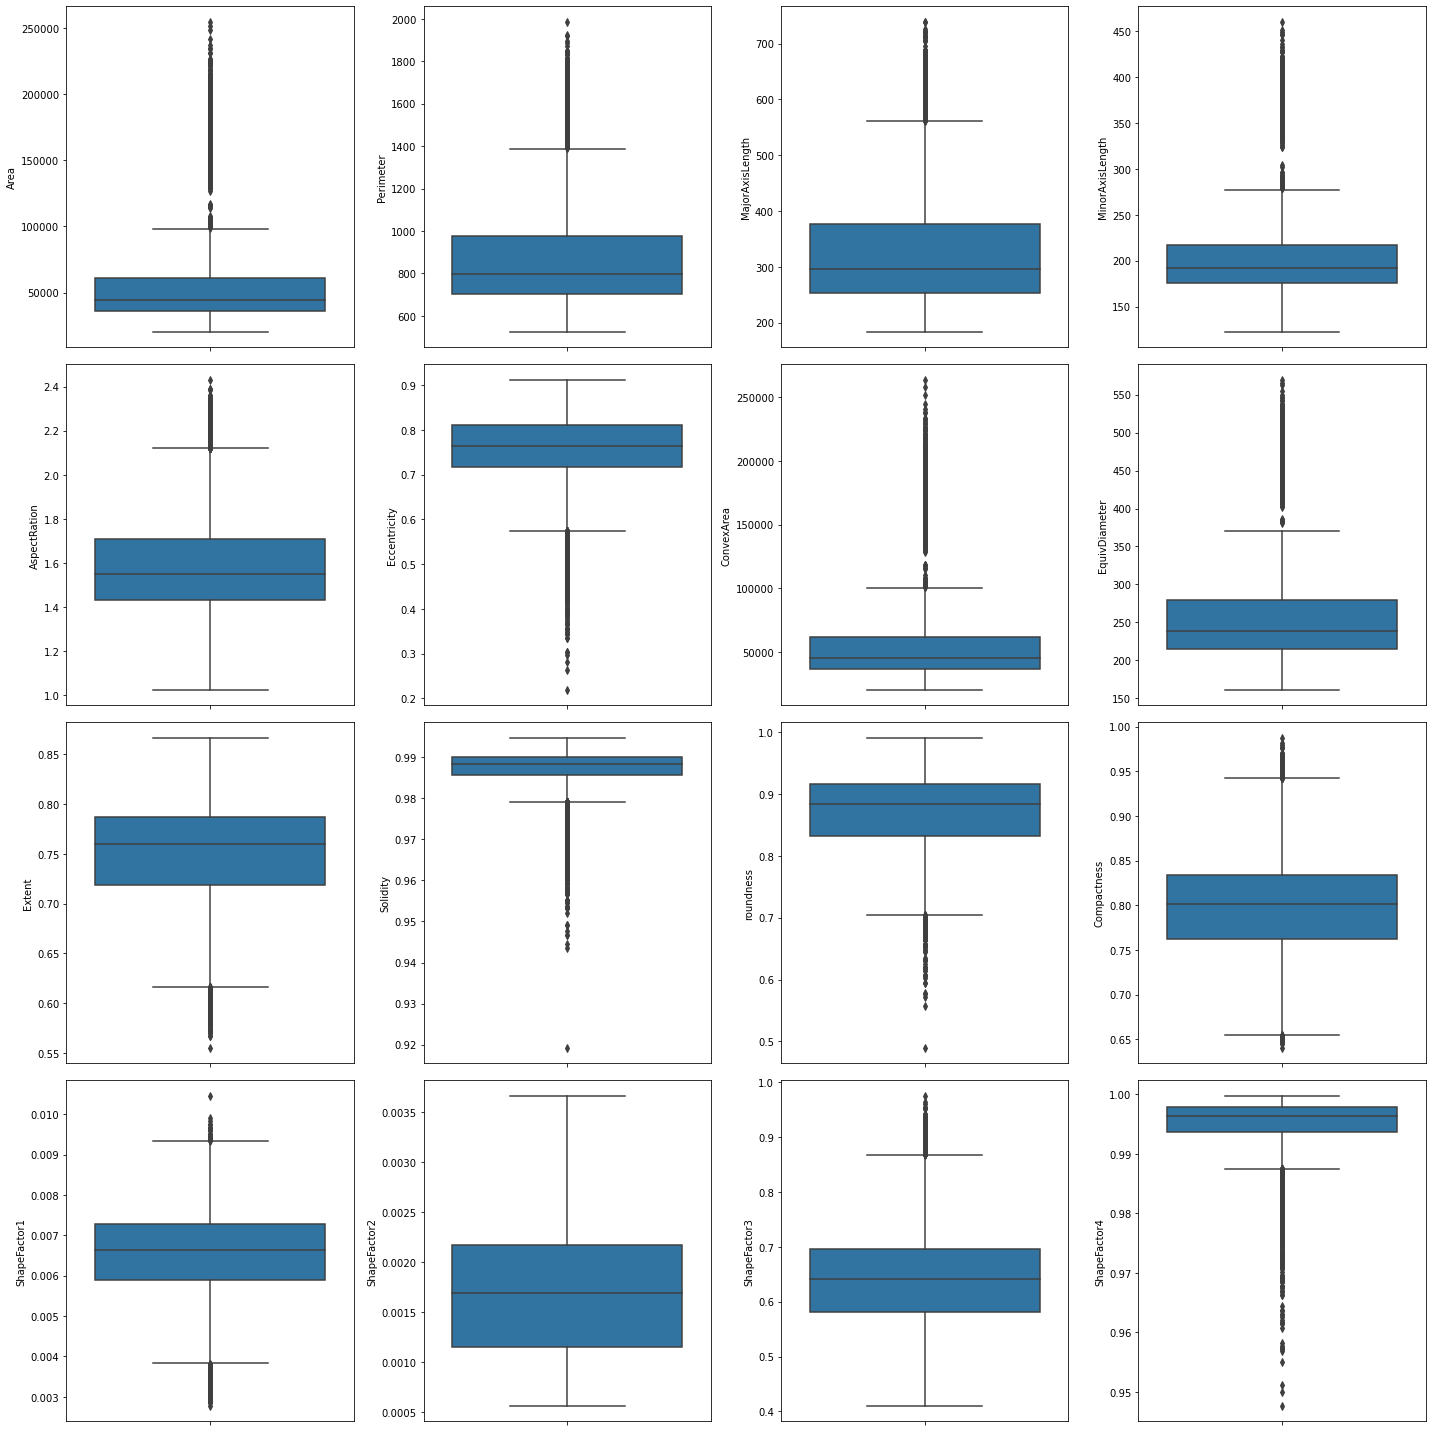

In [11]:
names = df1.columns
fig,axes = plt.subplots(4,4, figsize=(20,20))
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(y=name, data=df1, ax=ax )
plt.tight_layout()

<b> Histogram

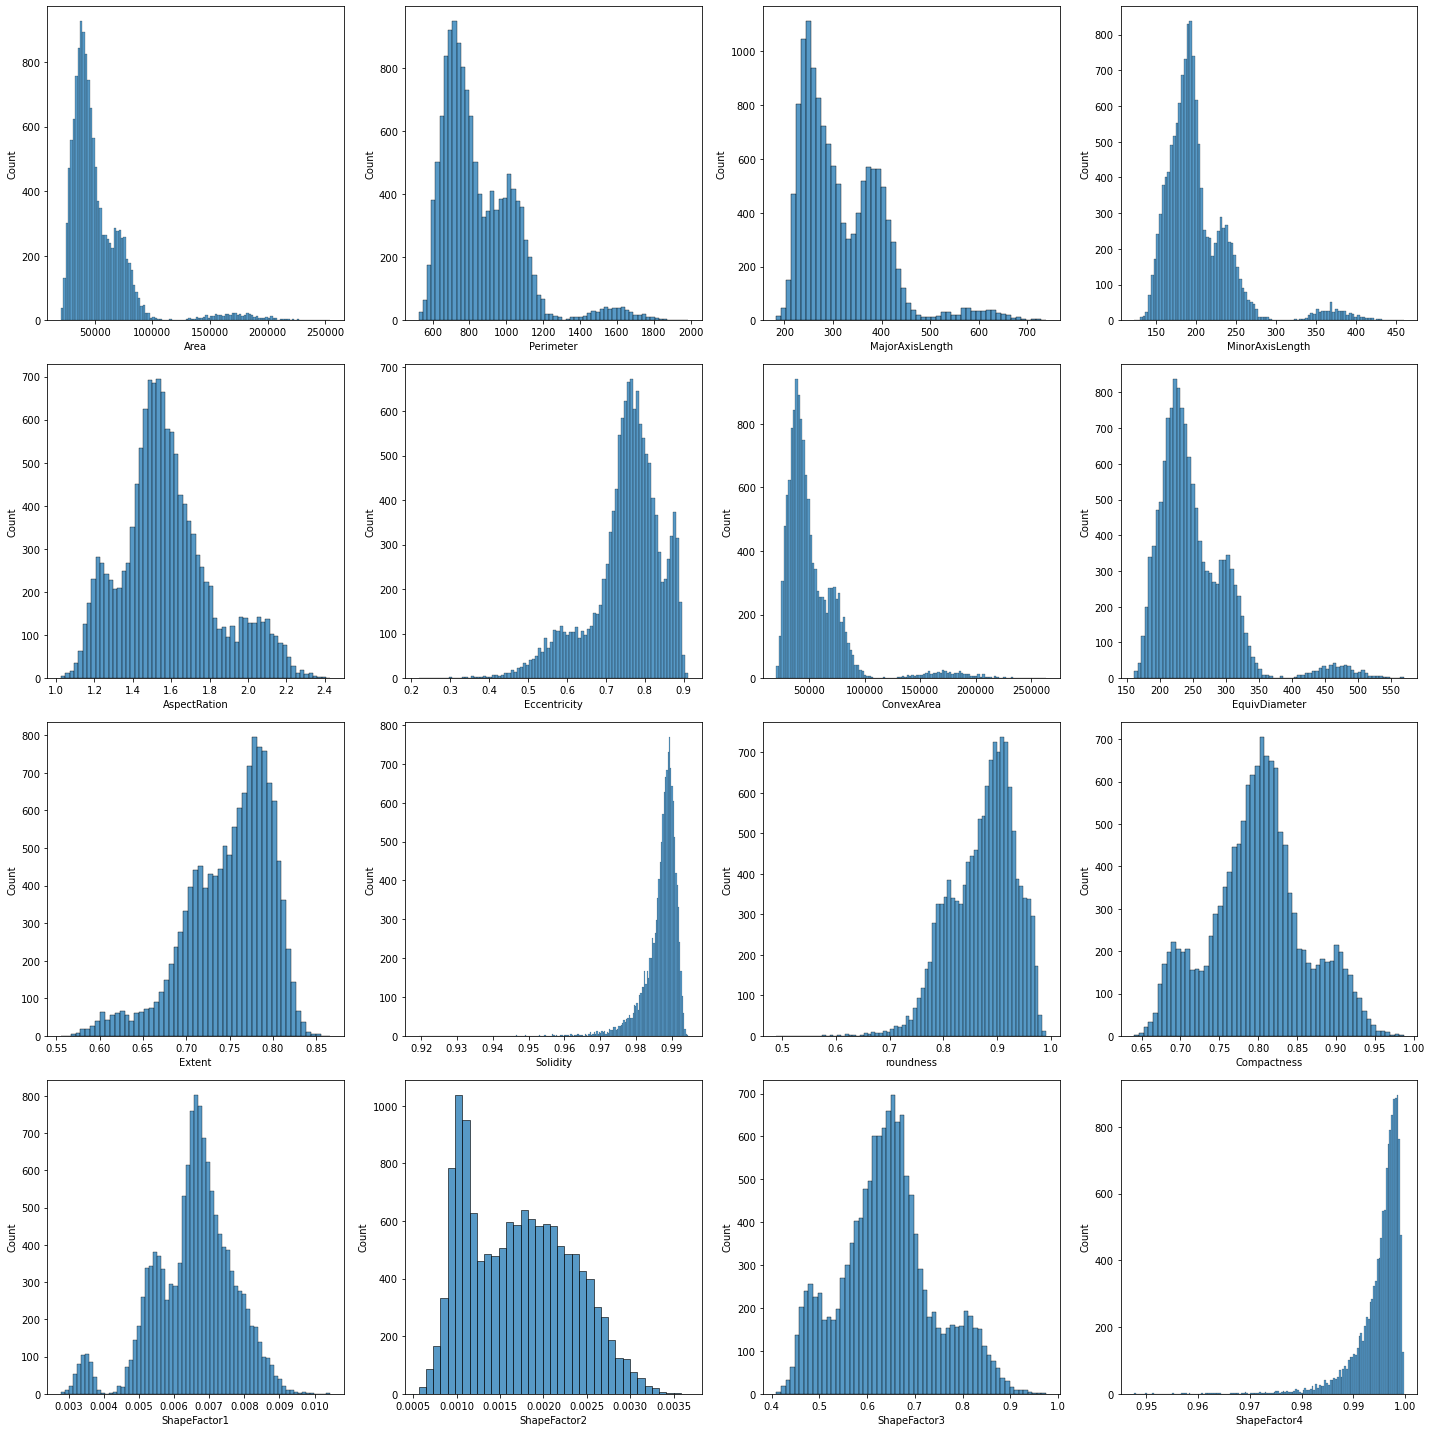

In [12]:
fig,axes = plt.subplots(4,4, figsize=(20,20))
for name, ax in zip(names, axes.flatten()):
    sns.histplot(x=name, data=df1, ax=ax)
plt.tight_layout()

<b> Pairplots

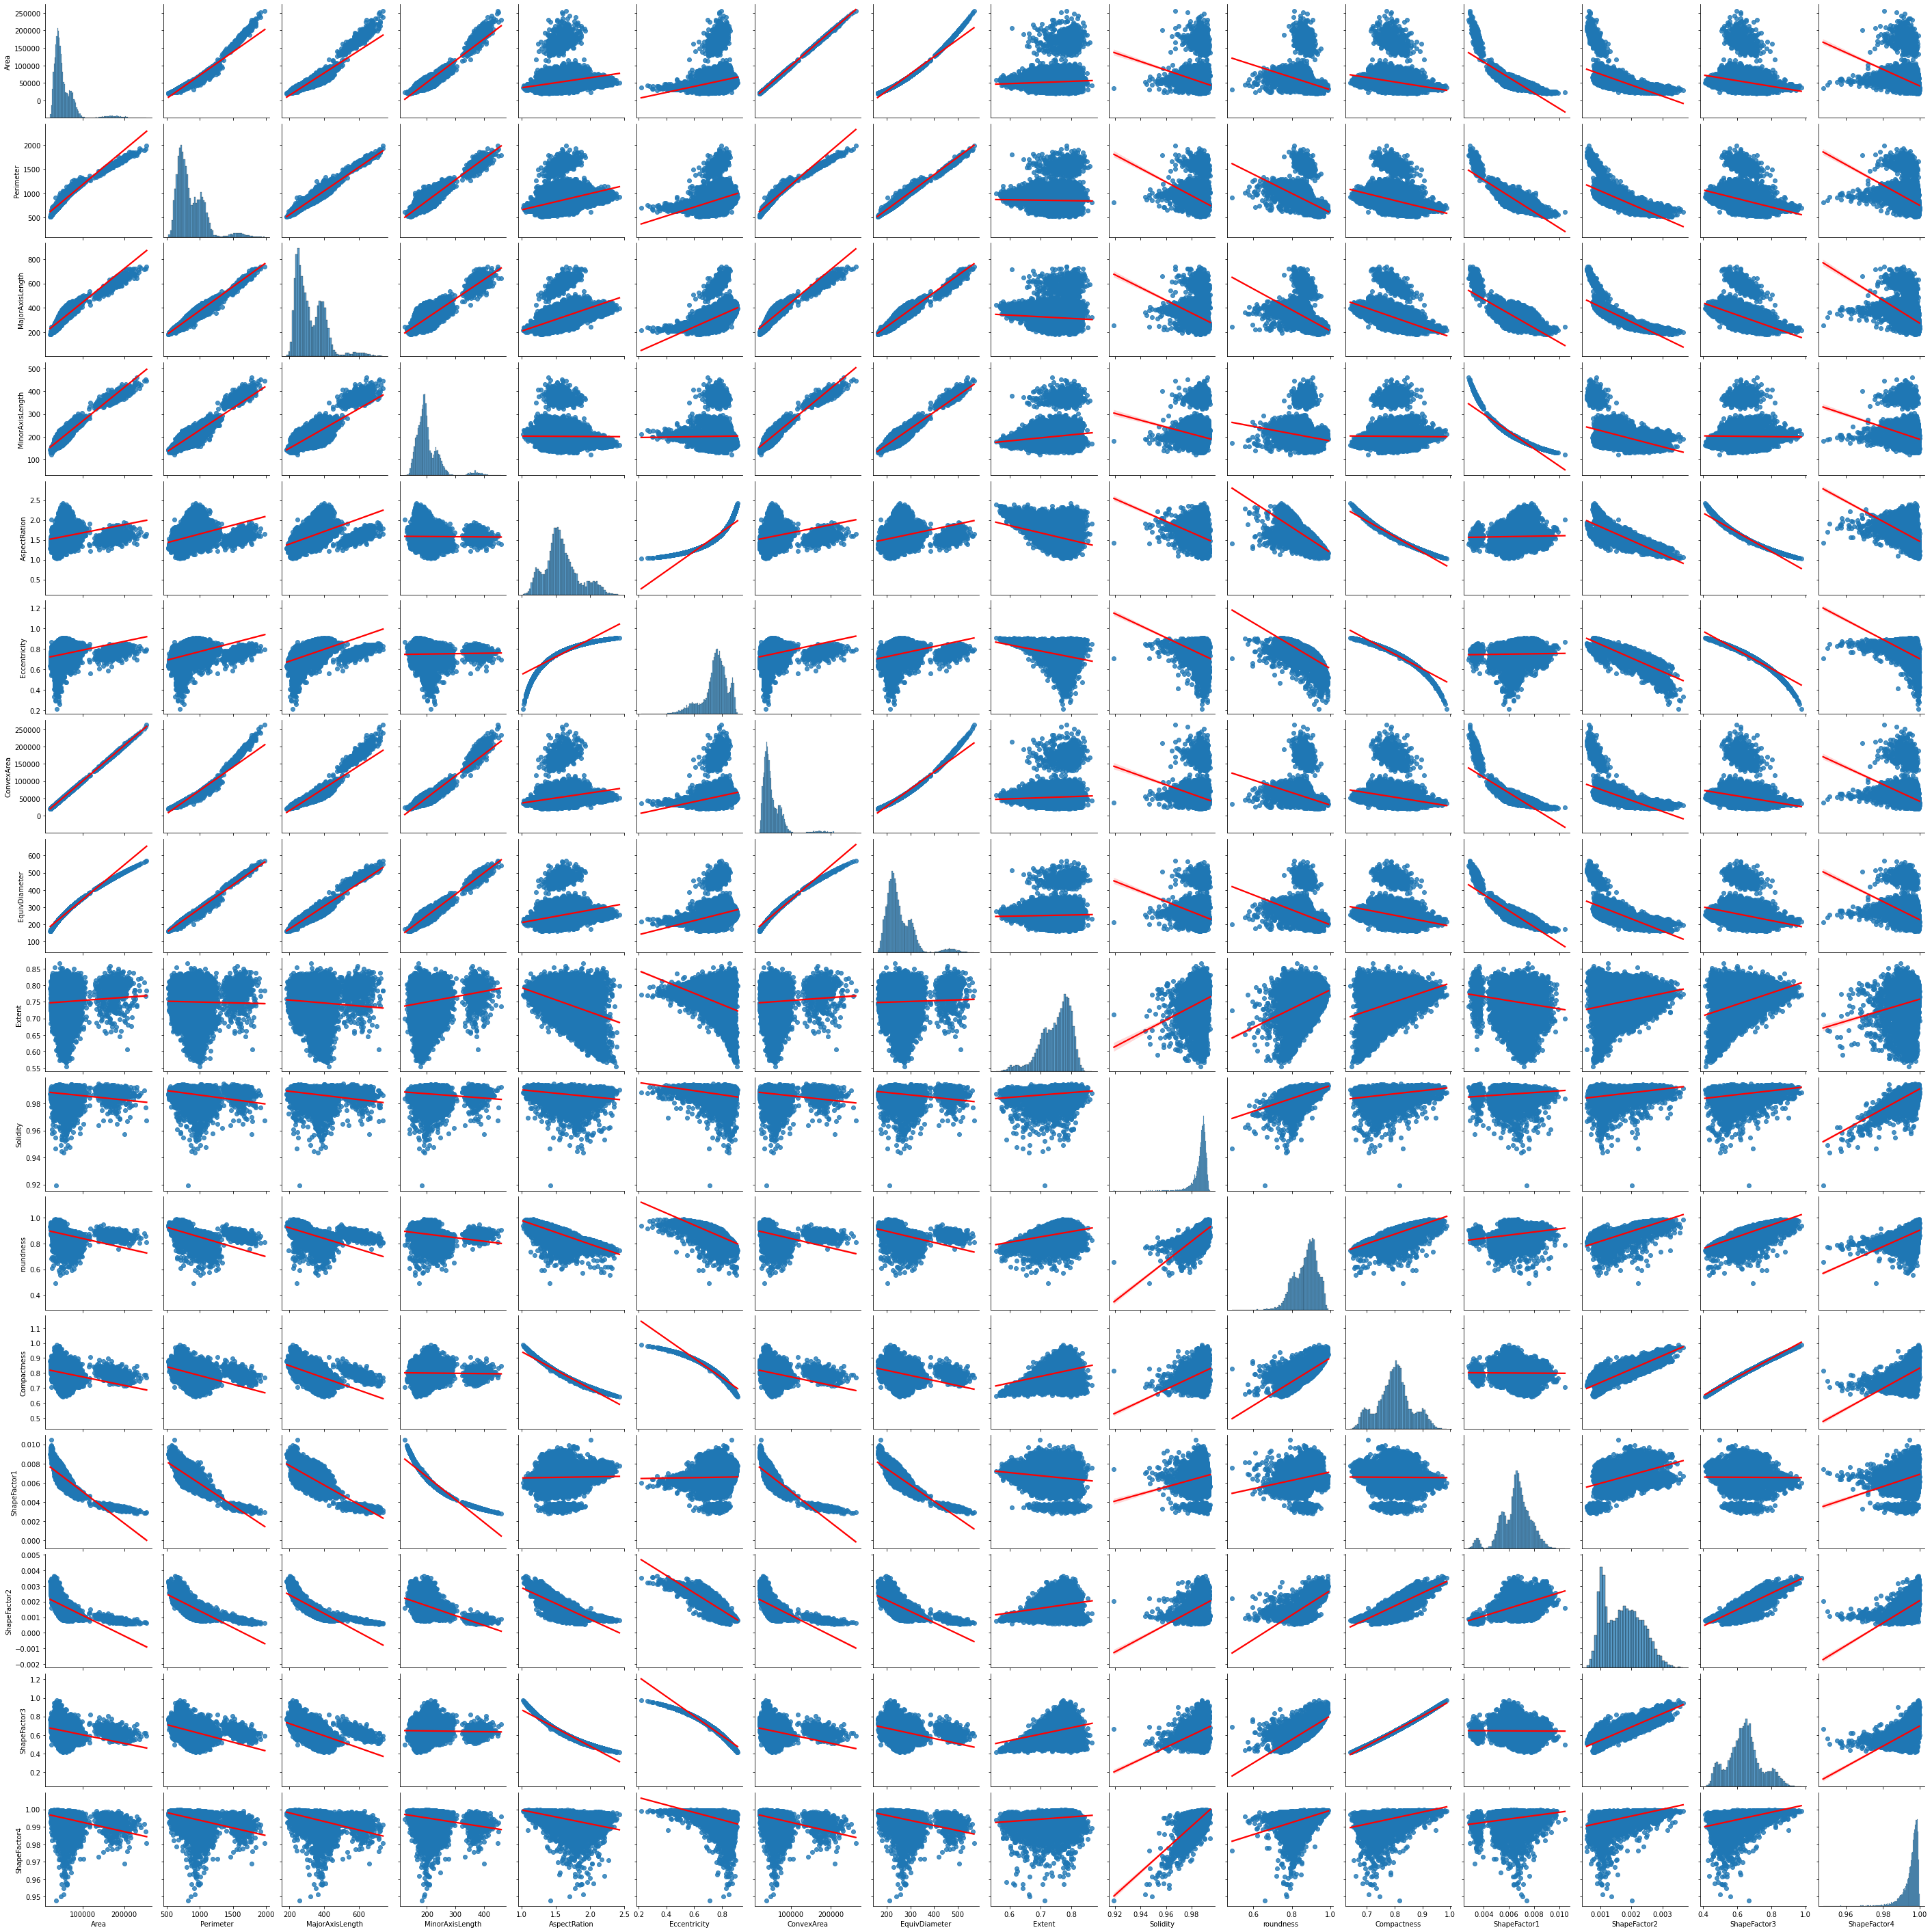

<Figure size 720x720 with 0 Axes>

In [13]:
sns.pairplot(df1, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.figure(figsize = (10, 10))
plt.show()

# Correlation Analysis

In [14]:
df1.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931836,0.951615,0.241692,0.267351,0.999939,0.984968,0.054345,-0.196511,-0.357530,-0.267840,-0.847983,-0.639305,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977337,0.913217,0.385228,0.390915,0.967689,0.991380,-0.021160,-0.303887,-0.547647,-0.406618,-0.864671,-0.767606,-0.408435,-0.429310
MajorAxisLength,0.931836,0.977337,1.000000,0.826119,0.550200,0.541746,0.932609,0.961732,-0.077982,-0.284203,-0.596303,-0.568118,-0.773699,-0.859237,-0.568093,-0.482477
MinorAxisLength,0.951615,0.913217,0.826119,1.000000,-0.009318,0.019272,0.951353,0.948567,0.145987,-0.155750,-0.210290,-0.014734,-0.947207,-0.471539,-0.019175,-0.263713
AspectRation,0.241692,0.385228,0.550200,-0.009318,1.000000,0.924293,0.243258,0.303601,-0.370102,-0.267582,-0.766946,-0.987689,0.024676,-0.837749,-0.978591,-0.449225
Eccentricity,0.267351,0.390915,0.541746,0.019272,0.924293,1.000000,0.269124,0.318512,-0.319300,-0.297427,-0.722177,-0.970308,0.020108,-0.859938,-0.981057,-0.449276
ConvexArea,0.999939,0.967689,0.932609,0.951353,0.243258,0.269124,1.000000,0.985226,0.052564,-0.206118,-0.362083,-0.269698,-0.847975,-0.640876,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961732,0.948567,0.303601,0.318512,0.985226,1.000000,0.028383,-0.231566,-0.435945,-0.327391,-0.892783,-0.713083,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.077982,0.145987,-0.370102,-0.319300,0.052564,0.028383,1.000000,0.191330,0.344411,0.354102,-0.141634,0.237880,0.347624,0.148502
Solidity,-0.196511,-0.303887,-0.284203,-0.155750,-0.267582,-0.297427,-0.206118,-0.231566,0.191330,1.000000,0.607115,0.304073,0.153371,0.343437,0.307549,0.702138


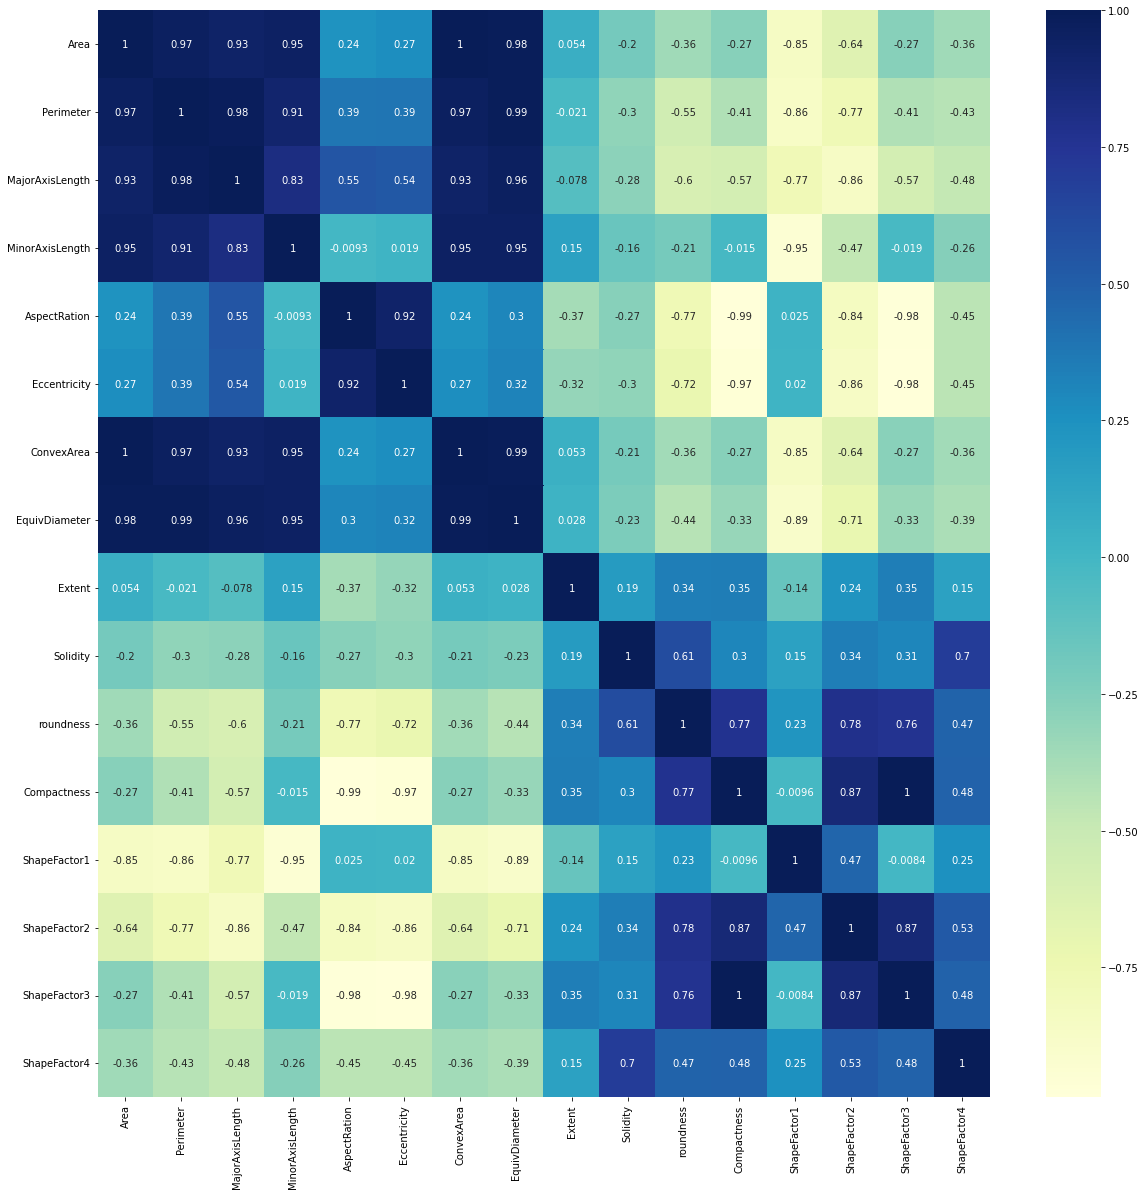

In [15]:
plt.figure(figsize = (20, 20))
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

# Feature Engineering

<b> There is stong correlation between Area, Perimeter, MinorAxisLength (> 0.9); also between ConvexArea and EquivDiameter and between Shapefactor3 and Compactness. Hence we choose to drop highly correlated columns like Area, EquivDiameter, Compactness and MajorAxisLength

In [16]:
df = df.drop(['Area','EquivDiameter','Compactness','MajorAxisLength','Bean ID'],axis=1) 

# Identifying nul/missing values Impute missing Values with Median

In [17]:
df.isnull().sum()

Perimeter          0
MinorAxisLength    3
AspectRation       1
Eccentricity       2
ConvexArea         0
Extent             0
Solidity           3
roundness          0
ShapeFactor1       4
ShapeFactor2       2
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [18]:
df = df.fillna(df.median())

C:\Users\rahul\AppData\Local\Temp\ipykernel_2776\3493596106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [19]:
df.isnull().sum()

Perimeter          0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
Extent             0
Solidity           0
roundness          0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

# Handling Of Outliers - Since data is skewed, we use IQR method to tremove the outliers

In [20]:
#Since data is skewed, we use IQR method to tremove the outliers

def remove_out(feat, new_df):
    for col in feat:
        if(col != 'Class'):
            percentile25 = df[col].quantile(0.25)
            percentile75 = df[col].quantile(0.75)
            iqr = percentile75-percentile25

            upper_limit = percentile75 + 1.5 * iqr
            lower_limit = percentile25 - 1.5 * iqr


            new_df = df[df[col] < upper_limit]
            new_df = df[df[col] > lower_limit]
            print(new_df.shape)
    return new_df

In [21]:
names = df.columns
org_df = df.copy(deep=True)
df = remove_out(names, org_df)

(13611, 13)
(13611, 13)
(13611, 13)
(12770, 13)
(13611, 13)
(13336, 13)
(12833, 13)
(13520, 13)
(13101, 13)
(13611, 13)
(13611, 13)
(12844, 13)


<b> Number of Outliers removed = 13611-12844 = 767

# Checking for Skewness Of Data

In [22]:
df.skew()

C:\Users\rahul\AppData\Local\Temp\ipykernel_2776\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Perimeter          1.687996
MinorAxisLength    2.301832
AspectRation       0.670978
Eccentricity      -1.018069
ConvexArea         3.051461
Extent            -0.908535
Solidity          -1.581865
roundness         -0.716427
ShapeFactor1      -0.551096
ShapeFactor2       0.237042
ShapeFactor3       0.185935
ShapeFactor4      -0.991671
dtype: float64

# Train Test Split for handling Imbalance

In [23]:
X = df.drop("Class",axis = 1)
y = df["Class"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 0)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.1, random_state = 0)
scoretab = pd.DataFrame(columns=['algo','split','penalty','solver','score'])

<b> Using SMOTE to handle imbalance

In [24]:
from imblearn.over_sampling import SMOTE
# import the metrics class
from sklearn import metrics

In [25]:
sm = SMOTE(random_state = 2)

In [26]:
X, y = sm.fit_resample(X, y)

<b> Exploring Random Oversampler as alternate

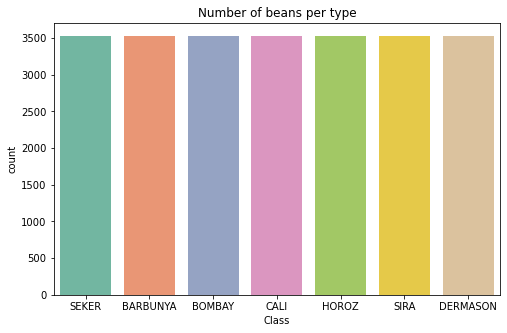

In [27]:
#Exploring Random Oversampler
from imblearn.over_sampling import RandomOverSampler
X_ros = df.drop("Class",axis = 1)
Y_ros = df["Class"]
ros = RandomOverSampler(random_state=0)
X_ros, Y_ros = ros.fit_resample(X_ros, Y_ros)
df_ros = X_ros
df_ros["Class"] = Y_ros
df_ros.shape
plt.figure(figsize = (8, 5))
sns.countplot(x = df_ros["Class"], palette="Set2")
plt.title("Number of beans per type")
plt.show()

# 80-20 test train split without k-fold cross validation

In [28]:
X_train_8020, X_test_8020, y_train_8020, y_test_8020 = train_test_split(X, y, test_size = 0.2, random_state = 0)

<b> Feature Scaling Techniques - Standard Scaler

In [29]:
scaler = StandardScaler()
scaler.fit(X_train_8020)

StandardScaler()

In [30]:
X_train_scaled_8020 = scaler.transform(X_train_8020)
X_test_scaled_8020 = scaler.transform(X_test_8020)

In [31]:
X_train_scaled_8020 = pd.DataFrame(X_train_scaled_8020, columns=X_train1.columns)
X_test_scaled_8020 = pd.DataFrame(X_test_scaled_8020, columns=X_test1.columns)

<b> Logistic Regression

In [32]:
modelLR_8020 = LogisticRegression(max_iter=4000)

In [33]:
modelLR_8020.fit(X_train_scaled_8020, y_train_8020)

LogisticRegression(max_iter=4000)

In [34]:
predLR_8020 = modelLR_8020.predict(X_test_scaled_8020)

In [35]:
cnf_matrix_8020 = metrics.confusion_matrix(y_test_8020, predLR_8020)

<b> Accuracy, Precision and Recall

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test_8020, predLR_8020)*100)
print("Precision:",metrics.precision_score(y_test_8020, predLR_8020,average='macro')*100)
print("Recall:",metrics.recall_score(y_test_8020, predLR_8020,average='macro')*100)
scoretab = scoretab.append({'algo':'logreg_stdscal','split':'8020','penalty':'none','solver':'lbfgs','score':modelLR_8020.score(X_test_scaled_8020, y_test_8020)*100},ignore_index = True)

Accuracy: 94.63671321594819
Precision: 94.67176857389778
Recall: 94.70211554256836


In [37]:
coef_df = pd.DataFrame(modelLR_8020.coef_)
coef_df['intercept'] = modelLR_8020.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.817319  1.924722 -1.909203 -1.078471  0.054300  0.199953 -1.276229   
1  3.582723  4.096767 -0.620505 -0.535748  4.242314  0.471159 -0.003934   
2  1.094228  1.055180  1.035711  0.517346  0.412360  0.314888  0.061896   
3 -3.518577 -3.369086 -1.546568  1.067339 -2.512259 -0.466143 -0.183675   
4  0.712374 -1.107220  4.406360  0.109552  0.683144 -0.076648  0.626563   
5  0.951495 -0.014128 -0.469909 -1.146163  0.343777 -0.297137  0.789630   
6 -3.639563 -2.586236 -0.895887  1.066144 -3.223634 -0.146071 -0.014252   

          7         8         9        10        11  intercept  
0 -1.701569 -2.711436 -3.061129  0.758212  1.518644   4.433109  
1  1.137735 -2.825490 -1.252740  0.603983 -0.456139  -2.397511  
2  1.727673 -4.000255 -2.078893 -1.108789 -1.329206   3.871952  
3  1.605407  6.352654  1.792738 -0.613223 -0.009818  -6.699413  
4 -1.547795  4.226376  2.187697 -1.516010 -1.343936  -1.002217  
5 -1.3195

<b> Exploring RobustScaler as alternate scaling strategy

In [38]:
from sklearn.preprocessing import RobustScaler
Xo = org_df.drop("Class",axis = 1)
yo = org_df["Class"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(Xo, yo, test_size = 0.2, random_state = 0)
X_train1 = RobustScaler().fit_transform(X_train1)
X_test1 = RobustScaler().fit_transform(X_test1)
modelLR_8020_rs = LogisticRegression(random_state=0,max_iter=1000).fit(X_train1, y_train1.values.ravel())
modelLR_8020_rs.fit(X_train1, y_train1)
predLR_8020_rs = modelLR_8020_rs.predict(X_test1)
cnf_matrix_8020 = metrics.confusion_matrix(y_test1, predLR_8020_rs)
print("Accuracy:",metrics.accuracy_score(y_test1, predLR_8020_rs)*100)
print("Precision:",metrics.precision_score(y_test1, predLR_8020_rs,average='macro')*100)
print("Recall:",metrics.recall_score(y_test1, predLR_8020_rs,average='macro')*100)
scoretab = scoretab.append({'algo':'logreg_robustscaler','split':'8020','penalty':'none','solver':'lbfgs','score':modelLR_8020_rs.score(X_test1, y_test1)*100},ignore_index = True)

Accuracy: 92.83878075651855
Precision: 94.05753782104792
Recall: 93.67286961546367


# 10-90 test train split without k-fold cross validation

In [39]:
X_train_9010, X_test_9010, y_train_9010, y_test_9010 = train_test_split(X, y, test_size = 0.9, random_state = 1)

In [40]:
scaler = StandardScaler()
scaler.fit(X_train_9010)

StandardScaler()

In [41]:
X_train_scaled_9010= scaler.transform(X_train_9010)
X_test_scaled_9010 = scaler.transform(X_test_9010)

In [42]:
X_train_scaled_9010 = pd.DataFrame(X_train_scaled_9010, columns=X_train_9010.columns)
X_test_scaled_9010 = pd.DataFrame(X_test_scaled_9010, columns=X_test_9010.columns)

In [43]:
modelLR_9010 = LogisticRegression(max_iter=4000)

In [44]:
modelLR_9010.fit(X_train_scaled_9010, y_train_9010)

LogisticRegression(max_iter=4000)

In [45]:
predLR_9010 = modelLR_9010.predict(X_test_scaled_9010)

<b> Confusion Matrix

In [46]:
cnf_matrix_9010 = metrics.confusion_matrix(y_test_9010, predLR_9010)

In [47]:
print(confusion_matrix(y_test_9010, predLR_9010))

[[3013    0   98    0    1   32   55]
 [   0 3165    0    0    0    0    0]
 [  65    0 3059    0   27    6   30]
 [   4    0    0 2780   15   70  301]
 [   6    0   37   21 3098    0   22]
 [  16    0    0   14    0 3064   74]
 [  10    0   15  218   90   45 2782]]


In [48]:
print("Accuracy:",metrics.accuracy_score(y_test_9010, predLR_9010)*100)
print("Precision:",metrics.precision_score(y_test_9010, predLR_9010,average='macro')*100)
print("Recall:",metrics.recall_score(y_test_9010, predLR_9010,average='macro')*100)
scoretab = scoretab.append({'algo':'logreg_stdscal','split':'1090','penalty':'none','solver':'lbfgs','score':modelLR_9010.score(X_test_scaled_9010, y_test_9010)*100},ignore_index = True)

Accuracy: 94.2787747942248
Precision: 94.30016292223196
Recall: 94.27438128570132


# K-fold cross validation

In [49]:
from sklearn import preprocessing

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

In [51]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [52]:
X_scaled_CV= scaler.transform(X)

In [53]:
X_scaled_CV = pd.DataFrame(X_scaled_CV, columns=X.columns)

<b> Label Encoding

In [54]:
label_encoder = preprocessing.LabelEncoder()
y= label_encoder.fit_transform(y)

In [55]:
y = pd.DataFrame(y)

In [56]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model_cv = LogisticRegression(solver='liblinear')
results = cross_val_score(model_cv, X_scaled_CV, y.values.ravel(), cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
scoretab = scoretab.append({'algo':'logreg_stdscal','split':'kfoldcv','penalty':'none','solver':'liblinear','score':results.mean()*100.0},ignore_index = True)

Accuracy: 94.191% (0.227%)


<b> Exploring Stratified K-fold

In [57]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state=None)
model = LogisticRegression(solver='liblinear')

kfoldscore1 = cross_val_score(model , X_scaled_CV, y.values.ravel(), cv = skf)
print("Accuracy: %.3f%% (%.3f%%)" % (kfoldscore1.mean()*100.0, kfoldscore1.std()*100.0))
scoretab = scoretab.append({'algo':'logreg_stdscal','split':'stratkfoldcv','penalty':'none','solver':'liblinear','score':kfoldscore1.mean()*100.0},ignore_index = True)

Accuracy: 93.531% (5.542%)


# Maximum Likelihood Estimation

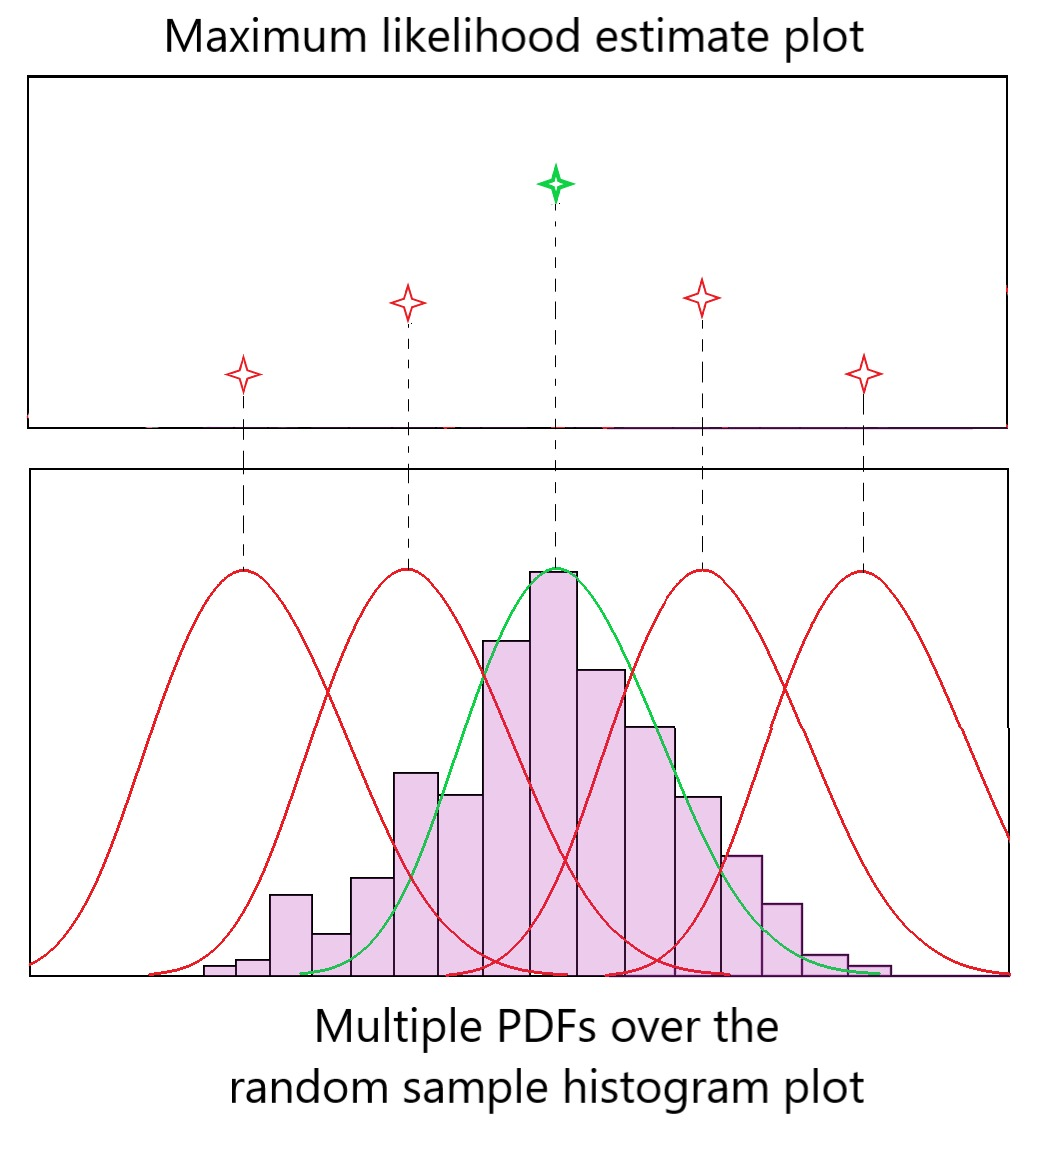

<b> MLE helps in determining the parameters (mean, standard deviation, etc) of normally distributed random sample data or a method of finding the best fitting Probability Density Function over the random sample data.

Here we're trying to fit the PDF bell curve over the random sample data. Red bell curves indicate poorly fitted PDF and the green bell curve shows the best fitting PDF over the data. We obtained the optimum bell curve by checking the values in Maximum Likelihood Estimate plot corresponding to each PDF.

As observed, the red plots poorly fit the normal distribution, hence their ‘likelihood estimate’ is also lower. The green PDF curve has the maximum likelihood estimate as it fits the data perfectly. This is how the maximum likelihood estimate method works.

# Support Vector Machine SVM as alternate model

# Standardization and Normalization - Applying Principal Component Analysis

<b> Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [58]:
from sklearn.svm import SVC

clf = SVC()
clf_8020 = clf.fit(X_train_scaled_8020, y_train_8020)
clf_1090 = clf.fit(X_train_scaled_9010, y_train_9010)

print ('Before PCA score 8020', clf_8020.score(X_test_scaled_8020, y_test_8020)*100.0)
scoretab = scoretab.append({'algo':'SVM','split':'8020','score':clf_8020.score(X_test_scaled_8020, y_test_8020)*100.0},ignore_index = True)
print ('Before PCA score 1090', clf_1090.score(X_test_scaled_9010, y_test_9010)*100.0)
scoretab = scoretab.append({'algo':'SVM','split':'1090','score':clf_1090.score(X_test_scaled_9010, y_test_9010)*100.0},ignore_index = True)

Before PCA score 8020 94.87957903258449
Before PCA score 1090 94.68357846444474


# Evaluation Metrics

In [59]:
# Building classification report for the results from the SVM classifier
predictedSVM1 = clf_8020.predict(X_test_scaled_8020)
reportSVM1 = classification_report(y_test_8020, predictedSVM1, output_dict=True)
reportdfSVM1 = pd.DataFrame(reportSVM1).transpose()
reportdfSVM1

,precision,recall,f1-score,support
BARBUNYA,0.972106,0.953488,0.962707,731.000000
BOMBAY,1.000000,1.000000,1.000000,689.000000
CALI,0.952593,0.969834,0.961136,663.000000
DERMASON,0.898734,0.918103,0.908316,696.000000
HOROZ,0.962912,0.961591,0.962251,729.000000
SEKER,0.976912,0.964387,0.970609,702.000000
SIRA,0.881868,0.878249,0.880055,731.000000
accuracy,0.948796,0.948796,0.948796,0.948796
macro avg,0.949304,0.949379,0.949296,4941.000000
weighted avg,0.949018,0.948796,0.948862,4941.000000


In [60]:
# Building classification report for the results from the SVM classifier
predictedSVM2 = clf_1090.predict(X_test_scaled_9010)
reportSVM2 = classification_report(y_test_9010, predictedSVM2, output_dict=True)
reportdfSVM2 = pd.DataFrame(reportSVM2).transpose()
reportdfSVM2

,precision,recall,f1-score,support
BARBUNYA,0.973616,0.945921,0.959569,3199.000000
BOMBAY,1.000000,1.000000,1.000000,3165.000000
CALI,0.954941,0.964230,0.959563,3187.000000
DERMASON,0.919344,0.884543,0.901608,3170.000000
HOROZ,0.961825,0.973304,0.967530,3184.000000
SEKER,0.957147,0.965909,0.961508,3168.000000
SIRA,0.862817,0.893671,0.877973,3160.000000
accuracy,0.946836,0.946836,0.946836,0.946836
macro avg,0.947099,0.946797,0.946822,22233.000000
weighted avg,0.947174,0.946836,0.946879,22233.000000


In [61]:
from scipy.stats import zscore
X_zscore_8020 = X_train_scaled_8020.apply(zscore)
X_zscore_1090 = X_train_scaled_9010.apply(zscore)

# X_zscore.head(5)

In [62]:
from sklearn.decomposition import PCA

pca_8020=PCA(n_components=5)
pca_8020.fit(X_zscore_8020)

pca_1090=PCA(n_components=5)
pca_1090.fit(X_zscore_1090)

PCA(n_components=5)

In [63]:
pca_8020.explained_variance_ 

array([5.73441612, 3.61883974, 1.10913843, 0.74590242, 0.51783681])

In [64]:
pca_8020.components_

array([[-0.33465021, -0.24829579, -0.29811702, -0.32592272, -0.29353325,
         0.06371127,  0.15495308,  0.31119254,  0.24133896,  0.40796374,
         0.32273514,  0.30224169],
       [-0.30735466, -0.41709381,  0.32793953,  0.28205644, -0.35646231,
        -0.29608233, -0.12688614, -0.23110174,  0.40850766, -0.01725232,
        -0.30473873, -0.01362421],
       [-0.01102352,  0.00649622, -0.24606102, -0.21305726, -0.06618494,
        -0.12812423, -0.82604054, -0.31082857, -0.07027782,  0.13497324,
         0.22624193, -0.14071626],
       [-0.10971225, -0.12926377,  0.03531332,  0.10709724, -0.11584442,
         0.89064094, -0.14869191,  0.01644893,  0.11742466,  0.00524785,
        -0.08384346, -0.32962154],
       [-0.07026614, -0.014476  , -0.06149312, -0.05819488,  0.00613454,
        -0.30866868,  0.09163469,  0.408045  ,  0.06881962,  0.09695023,
         0.03998653, -0.83769865]])

In [65]:
print(pca_8020.explained_variance_ratio_)

[0.47784383 0.30155472 0.09242353 0.06215539 0.04315088]


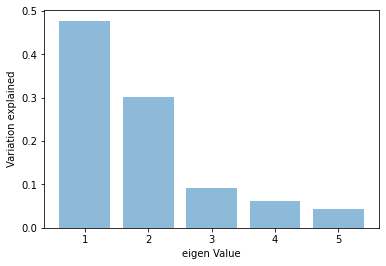

In [66]:
plt.bar(list(range(1,6)),pca_8020.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

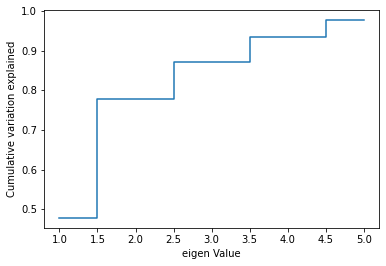

In [68]:
plt.step(list(range(1,6)),np.cumsum(pca_8020.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative variation explained')
plt.xlabel('eigen Value')
plt.show()

In [69]:
X_pca_8020=pca_8020.transform(X_zscore_8020)
X_pca_1090=pca_1090.transform(X_zscore_1090)

In [70]:
X_PCA_8020=pd.DataFrame(X_pca_8020)
X_PCA_8020.head()

,0,1,2,3,4
0,4.234612,-2.278711,-0.122144,-0.300172,0.024080
1,2.290548,-0.707541,-0.556830,0.908541,0.284685
2,-4.732665,-2.710978,1.011164,-0.982161,1.379230
3,2.717500,-0.566139,0.237005,-0.764522,0.488659
4,1.365157,-0.569006,-1.255236,0.246053,-0.269778


In [71]:
X_PCA_1090=pd.DataFrame(X_pca_1090)
X_PCA_1090.head()

,0,1,2,3,4
0,-1.380620,-0.707635,0.196705,-0.501552,-0.436823
1,-1.966271,2.770969,0.217043,1.831227,-0.175150
2,-3.441475,-3.115995,-0.212256,0.309188,-0.741363
3,0.210995,-0.237857,3.338208,-0.252178,-1.013449
4,2.358104,0.583524,-0.541936,-1.262988,-0.260625


In [72]:
X_pca_8020 = X_PCA_8020
y_pca_8020 = y_train_8020
X_train_pca_8020, X_test_pca_8020, y_train_pca_8020, y_test_pca_8020 = train_test_split(X_pca_8020, y_pca_8020, test_size = 0.2, random_state = 0)

In [73]:
clf_8020 = SVC()
clf_8020.fit(X_train_pca_8020, y_train_pca_8020)
print ('After PCA score 8020', clf_8020.score(X_test_pca_8020, y_test_pca_8020))
scoretab = scoretab.append({'algo':'SVM_PCA','split':'8020','score':clf_8020.score(X_test_pca_8020, y_test_pca_8020)*100.0},ignore_index = True)

After PCA score 8020 0.9524411839109537


In [74]:
X_pca_1090 = X_PCA_1090
y_pca_1090 = y_train_9010
X_train_pca_1090, X_test_pca_1090, y_train_pca_1090, y_test_pca_1090 = train_test_split(X_pca_1090, y_pca_1090, test_size = 0.2, random_state = 0)

In [75]:
clf_1090 = SVC()
clf_1090.fit(X_train_pca_1090, y_train_pca_1090)
print ('After PCA score 1090', clf_1090.score(X_test_pca_1090, y_test_pca_1090))
scoretab = scoretab.append({'algo':'SVM_PCA','split':'1090','score':clf_1090.score(X_test_pca_1090, y_test_pca_1090)*100.0},ignore_index = True)

After PCA score 1090 0.9453441295546559


# Need for L1 L2 Regularization

<b> Regularization is required to prevent overfitting of a training model. Overfitting happens when we have low training error and high testing error. Regularization, significantly reduces the variance of the model, without substantial increase in its bias.
<p><b> L1 regularization penalizes the sum of absolute values of the weights, whereas L2 regularization penalizes the sum of squares of the weights. 
The L1 regularization solution is sparse. The L2 regularization solution is non-sparse.
L2 regularization doesn’t perform feature selection, since weights are only reduced to values near 0 instead of 0. L1 regularization has built-in feature selection.
L1 regularization is robust to outliers, L2 regularization is not.

<b> Below we apply logistic regression to both 8020 and 1090 splits with L1,L2 regularization

In [76]:
LogRegRegular = LogisticRegression(penalty='l2',solver='lbfgs',random_state=0,max_iter=4000).fit(X_train_8020, y_train_8020.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'8020','penalty':'l2','solver':'lbfgs','score':LogRegRegular.score(X_test_8020, y_test_8020)*100},ignore_index = True)

In [77]:
LogRegRegular = LogisticRegression(penalty='l2',solver='lbfgs',random_state=0,max_iter=4000).fit(X_train_9010, y_train_9010.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'1090','penalty':'l2','solver':'lbfgs','score':LogRegRegular.score(X_test_9010, y_test_9010)*100},ignore_index = True)

In [78]:
LogRegRegular = LogisticRegression(penalty='none',solver='lbfgs',random_state=0,max_iter=10000).fit(X_train_8020, y_train_8020.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'8020','penalty':'none','solver':'lbfgs','score':LogRegRegular.score(X_test_8020, y_test_8020)*100},ignore_index = True)

In [79]:
LogRegRegular = LogisticRegression(penalty='none',solver='lbfgs',random_state=0,max_iter=10000).fit(X_train_9010, y_train_9010.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'1090','penalty':'none','solver':'lbfgs','score':LogRegRegular.score(X_test_9010, y_test_9010)*100},ignore_index = True)

In [80]:
LogRegRegular = LogisticRegression(penalty='l2',solver='newton-cg',random_state=0,max_iter=10000).fit(X_train_8020, y_train_8020.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'8020','penalty':'l2','solver':'newton-cg','score':LogRegRegular.score(X_test_8020, y_test_8020)*100},ignore_index = True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [81]:
LogRegRegular = LogisticRegression(penalty='l2',solver='newton-cg',random_state=0,max_iter=10000).fit(X_train_9010, y_train_9010.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'1090','penalty':'l2','solver':'newton-cg','score':LogRegRegular.score(X_test_9010, y_test_9010)*100},ignore_index = True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [82]:
LogRegRegular = LogisticRegression(penalty='none',solver='newton-cg',random_state=0,max_iter=10000).fit(X_train_8020, y_train_8020.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'8020','penalty':'none','solver':'newton-cg','score':LogRegRegular.score(X_test_8020, y_test_8020)*100},ignore_index = True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [83]:
LogRegRegular = LogisticRegression(penalty='none',solver='newton-cg',random_state=0,max_iter=10000).fit(X_train_9010, y_train_9010.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'1090','penalty':'none','solver':'newton-cg','score':LogRegRegular.score(X_test_9010, y_test_9010)*100},ignore_index = True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [84]:
LogRegRegular = LogisticRegression(penalty='l1',solver='liblinear',random_state=0,max_iter=10000).fit(X_train_8020, y_train_8020.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'8020','penalty':'l1','solver':'liblinear','score':LogRegRegular.score(X_test_8020, y_test_8020)*100},ignore_index = True)

In [85]:
LogRegRegular = LogisticRegression(penalty='l1',solver='liblinear',random_state=0,max_iter=10000).fit(X_train_9010, y_train_9010.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'1090','penalty':'l1','solver':'liblinear','score':LogRegRegular.score(X_test_9010, y_test_9010)*100},ignore_index = True)

In [86]:
LogRegRegular = LogisticRegression(penalty='l2',solver='liblinear',random_state=0,max_iter=10000).fit(X_train_8020, y_train_8020.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'8020','penalty':'l2','solver':'liblinear','score':LogRegRegular.score(X_test_8020, y_test_8020)*100},ignore_index = True)

In [87]:
LogRegRegular = LogisticRegression(penalty='l2',solver='liblinear',random_state=0,max_iter=10000).fit(X_train_9010, y_train_9010.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'1090','penalty':'l2','solver':'liblinear','score':LogRegRegular.score(X_test_9010, y_test_9010)*100},ignore_index = True)

In [88]:
LogRegRegular = LogisticRegression(penalty='l1',solver='saga',random_state=0,max_iter=10000).fit(X_train_8020, y_train_8020.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'8020','penalty':'l1','solver':'saga','score':LogRegRegular.score(X_test_8020, y_test_8020)*100},ignore_index = True)

In [89]:
LogRegRegular = LogisticRegression(penalty='l1',solver='saga',random_state=0,max_iter=10000).fit(X_train_9010, y_train_9010.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'1090','penalty':'l1','solver':'saga','score':LogRegRegular.score(X_test_9010, y_test_9010)*100},ignore_index = True)

In [90]:
LogRegRegular = LogisticRegression(penalty='l2',solver='saga',random_state=0,max_iter=10000).fit(X_train_8020, y_train_8020.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'8020','penalty':'l2','solver':'saga','score':LogRegRegular.score(X_test_8020, y_test_8020)*100},ignore_index = True)

In [91]:
LogRegRegular = LogisticRegression(penalty='l2',solver='saga',random_state=0,max_iter=10000).fit(X_train_9010, y_train_9010.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'1090','penalty':'l2','solver':'saga','score':LogRegRegular.score(X_test_9010, y_test_9010)*100},ignore_index = True)

In [92]:
LogRegRegular = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5,random_state=0,max_iter=10000).fit(X_train_8020, y_train_8020.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'8020','penalty':'elasticnet','solver':'saga','score':LogRegRegular.score(X_test_8020, y_test_8020)*100},ignore_index = True)

In [93]:
LogRegRegular = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5,random_state=0,max_iter=10000).fit(X_train_9010, y_train_9010.values.ravel())
scoretab = scoretab.append({'algo':'logreg','split':'1090','penalty':'elasticnet','solver':'saga','score':LogRegRegular.score(X_test_9010, y_test_9010)*100},ignore_index = True)

# Tabulated View of All Scores

In [94]:
scoretab.sort_values(by=['score'])

,algo,split,penalty,solver,score
26,logreg,1090,elasticnet,saga,63.207844
24,logreg,1090,l2,saga,63.207844
22,logreg,1090,l1,saga,63.207844
23,logreg,8020,l2,saga,73.527626
21,logreg,8020,l1,saga,73.527626
25,logreg,8020,elasticnet,saga,73.527626
19,logreg,8020,l2,liblinear,81.602914
20,logreg,1090,l2,liblinear,82.737372
12,logreg,1090,none,lbfgs,84.765889
10,logreg,1090,l2,lbfgs,84.788378


# Model Justification

<b> In the above table we find that SVM with PCA gives the best accuracy score for the 8020 split, followed by Logistic Regression with Standard Scaling and LBFGS. <p><b>10-90 split of data gives lower test accuracy. <p><b>Cross validation provides better scores than most 8020 or 1090 splits. <p><b>L1 regularization provides better accuracy than L2 for reasons stated above. <p><b>For liblinear l1 performs better while for saga both are equivalent. 

# Overfitting/Underfitting of data

<b>Since the accuracy is almost same for the predictions done on Train and test data, we can say that there is neither overfitting nor underfitting of the model

<b>If the model would have given a greater accuracy on the training data as compared to the testing data, we would have said the the model has overfitted.
<p><b>However, in our case, thaccuracy is almost the same in case of training and testing data. Therefore, we can say that the model is well-fit